Training Accuracy: 0.9478260869565217
Test Accuracy: 0.9230769230769231
F1-Score: 0.9538461538461539
ROC-AUC Score: 0.9196428571428572


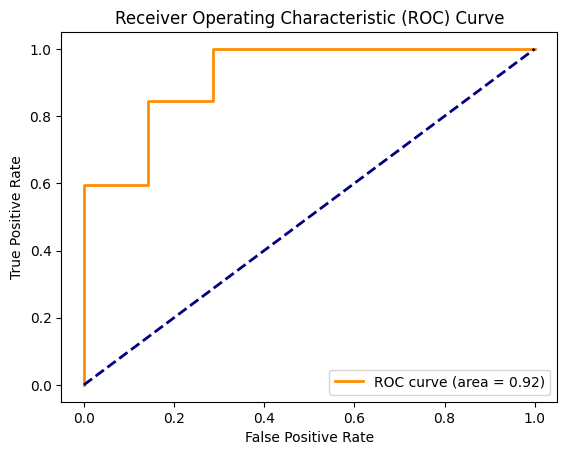

Cross-Validation Scores: [0.91304348 0.89130435 0.93478261 0.91304348 0.95652174]
Mean Cross-Validation Accuracy: 0.9217391304347826


In [2]:
# svm_model.py

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

# Load the dataset
def load_data(filepath):
    df = pd.read_csv(filepath, delimiter=',')
    return df

# Preprocess the data
def preprocess_data(df):
    X = df.drop(['name', 'status'], axis=1)  # Drop non-feature columns
    y = df['status']  # Target variable
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test

# Apply SMOTE to balance the training data
def balance_data(X_train, y_train):
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
    return X_resampled, y_resampled

# Train and evaluate the SVM model
def train_svm(X_train, X_test, y_train, y_test):
    svm = SVC(probability=True, random_state=42)
    svm.fit(X_train, y_train)
    
    # Predict on the training set
    y_train_pred = svm.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print("Training Accuracy:", train_accuracy)
    
    # Predict on the test set
    y_test_pred = svm.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print("Test Accuracy:", test_accuracy)

    # Evaluate the model using different metrics
    y_prob = svm.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
    f1 = classification_report(y_test, y_test_pred, output_dict=True)['1']['f1-score']
    roc_auc = roc_auc_score(y_test, y_prob)

    print("F1-Score:", f1)
    print("ROC-AUC Score:", roc_auc)

    # Plot the ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    
    # Cross-validation for robustness
    scores = cross_val_score(svm, X_train, y_train, cv=5, scoring='accuracy')
    print("Cross-Validation Scores:", scores)
    print("Mean Cross-Validation Accuracy:", scores.mean())

# Main function to run the script
if __name__ == "__main__":
    filepath = r"C:\Users\bhatt\Dropbox\Aryan\Code\ParkinsonsResearchProj\parkinsons.data"
    df = load_data(filepath)
    X_train, X_test, y_train, y_test = preprocess_data(df)
    X_train_balanced, y_train_balanced = balance_data(X_train, y_train)
    
    # Train the SVM model
    train_svm(X_train_balanced, X_test, y_train_balanced, y_test)
